Project

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns

In [2]:
#Loading dataset
df = pd.read_csv("Dataset.csv")
df.head(-1)


,Gender,Age (in years),State,Type of City,Employment,Product_Category_You_Like_Most
0,Female,22,Haryana,TIER 2,Student,Books & Novels
1,Male,20,Delhi,TIER 2,Student,"Entertainment Subscriptions(Netflix, Prime Etc.)"
2,Female,20,Delhi,TIER 1,Student,Books & Novels
3,Male,21,Delhi,TIER 1,Student,Electronic Gadgets
4,Male,19,New Delhi,TIER 1,Student,Gaming Devices
...,...,...,...,...,...,...
242,Male,20,Delhi,TIER 2,Student,"Entertainment Subscriptions(Netflix, Prime Etc.)"
243,Female,26,Delhi,TIER 1,Self Employed,Books & Novels
244,Female,22,Haryana,TIER 2,Self Employed,Electronic Gadgets
245,Female,24,Bihar,TIER 3,Salaried,Apparel


**Data preprocessing**

In [3]:
#look for unique datapoints to select suitable encoding
f

Gender : 2
Age (in years) : 14
State : 7
Type of City : 3
Employment : 3
Product_Category_You_Like_Most : 6


In [4]:
#drop "Age" column as we dont want to encode it



In [5]:
#Encoding categorical variables by applying Label encoder

from sklearn import preprocessing



In [6]:
#Putting together dataframe
ds = pd.concat([df_nonAge,df_temp], axis=1 , join='inner')
first_col = ds.pop('Age (in years)')
ds.insert(1 , 'Age (in years)' , first_col)
ds.head()

,Gender,Age (in years),State,Type of City,Employment,Product_Category_You_Like_Most
0,0,22,2,1,2,1
1,1,20,1,1,2,3
2,0,20,1,0,2,1
3,1,21,1,0,2,2
4,1,19,3,0,2,5


In [7]:
 #Extracting Independent and dependent Variable  
x= ds.iloc[:, [0,4]].values  
y= ds.iloc[:,5].values 

In [8]:
#Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.9) #Set optimal value for test_size

In [9]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [10]:
# Fitting Gaussian Naive bayes to the training set  


GaussianNB()

In [11]:
# Predicting the test set result  
y_pred= classifier.predict(x_test)  


In [12]:
# Creat the Confusion matrix  
from sklearn import metrics


accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)


[[ 2  1  7  0  0  0]
 [ 1  0 11  0  0  0]
 [ 2  1  8  0  0  0]
 [ 3  0  7  0  0  0]
 [ 2  0  1  0  0  0]
 [ 1  1  2  0  0  0]]
Accuracy score: 0.2


Best alpha using built-in LassoCV: 0.019901
Best score using built-in LassoCV: 0.000000
Lasso picked 0 variables and eliminated the other 2 variables


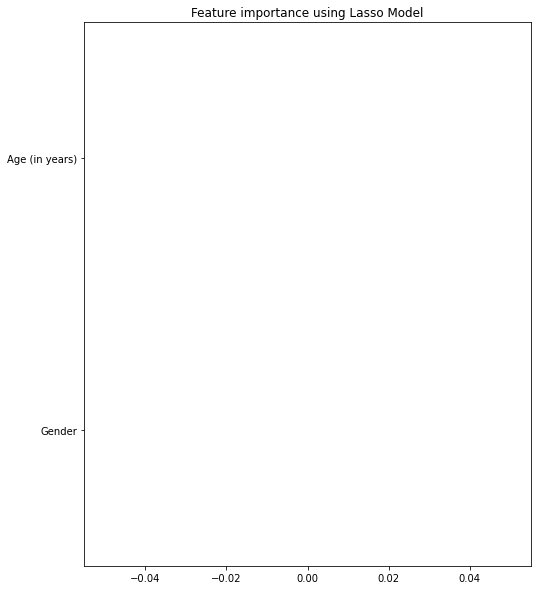

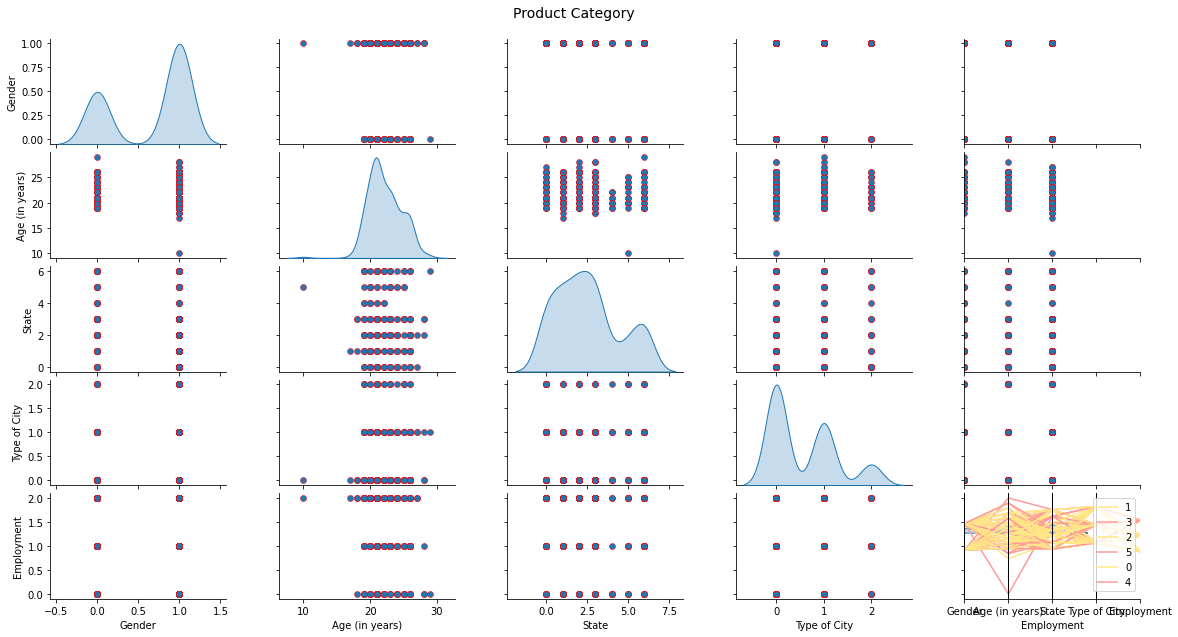

In [13]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_,index= ['Gender', 'Age (in years)'])

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,10.0)
imp_coef.plot(kind = "barh" )
plt.title("Feature importance using Lasso Model")


# Pair-wise Scatter Plots
cols = ['Gender', 'Age (in years)', 'State', 'Type of City', 'Employment']
pp = sns.pairplot(ds[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="r", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Product Category', fontsize=14)

# Scaling attribute values to avoid few outliers
cols = ['Gender', 'Age (in years)', 'State', 'Type of City', 'Employment']
subset_ds = ds[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_ds = ss.fit_transform(subset_ds)
scaled_ds = pd.DataFrame(scaled_ds, columns=cols)
final_ds = pd.concat([scaled_ds, ds['Product_Category_You_Like_Most']], axis=1)
final_ds.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_ds, 'Product_Category_You_Like_Most', color=('#FFE888', '#FF9999'))